In [15]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import random

In [16]:
def processImg(image):
    '''
    Inputs the image data as 14 lines and outputs an numpy array of length 196
    '''
    imageData = []
    
    for i in image:
        imageSlice = [float(x) for x in i.split(" ")[0:14]] #pick first 14 elements after splitting based on " "
        imageData.append(imageSlice)
    
    imageData = np.array(imageData)
    imageData = np.reshape(imageData, (196,))  # reshapes the 14,14 matrix into array of length 196
    return (imageData)
        
    

In [17]:
def readData(filename):
    '''
    Reads a file and outputs the image vectors and labels for all images in the file
    '''
    
    f = open(filename,'r')

    data = []
    i=0
    for x in f:
        data.append(x)
        
    imgData = []
    imgLabel = []
    

    for num in range(0,10):   # iterator to iterate over the 10 digits
        for fileNo in range(0,250):  # iterator to iterate over the 250 files for a single digit

            startRow = fileNo*16 + num*4000 #calculates the starting row for a particukar
            fileData = data[startRow:(startRow+16)]
            img = processImg(fileData[1:15])

            imgData.append(img)
            imgLabel.append(num)
            
    return([imgData,imgLabel])
    
    
    

In [18]:
#Change file paths accordingly
trainData,trainLabel = readData('/axp/rim/probc/dev/rgunukul/hackathons/GIM_Hackathon_2017/plan_my_trip/processData2/work/digits_train.txt')
testData,testLabel = readData('/axp/rim/probc/dev/rgunukul/hackathons/GIM_Hackathon_2017/plan_my_trip/processData2/work/digits_test.txt')

5


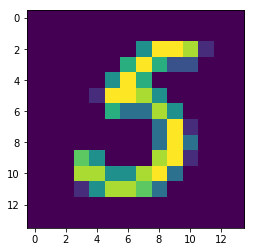

In [19]:
fileNo=1323

plt.imshow( np.reshape(trainData[fileNo],(14,14)))
print(trainLabel[fileNo])    

## Perceptron Modeling


#### Helper functions

In [24]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def shuffleData(data,label):
    '''
    Shuffles the data so that all digits are not stacked sequentially
    '''
    
    zipData = [i for i in zip(data,label)]
    random.shuffle(zipData)
    
    data = [np.array(i[0]) for i in zipData]
    label = [i[1] for i in zipData]
    
    return([data,label])


def predict(weight, data):
    '''
    Given input data and weights, outputs binary classification prediction
    '''
    
    y_pred = np.array([sigmoid(x) for x in np.matmul(data,W)])
    
    output = np.array([1 if x>= 0.5 else 0 for x in y_pred ])
    
    return(output)


def likelihood(pred,labels):
    '''Calculates log likelihood function'''
    
    logpred = np.array([math.log(i) for i in pred])
    
    return(-np.mean(labels*logpred + (1-labels)*(1-logpred)))


def accuracy(pred,label):
    '''Calculates accuracy metric'''
    
    out = [1 if x[0]==x[1] else 0 for x in zip(pred,label) ]
    
    return(sum(out)/float(len(pred)))


def calcMetric(pred, label):
    '''Calculates confusion matrix, precision, recall and f1 score for given set of predictions and labels'''
    
    confusionMatrix=[[0,0],[0,0]]
    
    totalSize = len(pred)
    
    true_positive = float(np.sum([1 if (x[0]==1 and x[1]==1) else 0 for x in zip(pred,label)]))
    true_negative = float(np.sum([1 if (x[0]==0 and x[1]==0) else 0 for x in zip(pred,label)]))
    
    false_positive = float(np.sum([1 if (x[0]==1 and x[1]==0) else 0 for x in zip(pred,label)]))
    false_negative = float(np.sum([1 if (x[0]==0 and x[1]==1) else 0 for x in zip(pred,label)]))
    
    if (true_positive+false_positive) != 0:
        precision = true_positive/(true_positive + false_positive)
    else:
        precision = 0
        
    if (true_positive + false_negative)!=0:
        recall = true_positive/(true_positive + false_negative)
    else:
        recall = 0
    
    if recall==0 or precision ==0:
        f1 =0
    else:
        f1 = 2/((1/precision) + (1/recall))
    
    confusionMatrix[0][0] = true_positive/float(totalSize)
    confusionMatrix[0][1] = false_negative/float(totalSize)
    confusionMatrix[1][0] = false_positive/float(totalSize)
    confusionMatrix[1][1] = true_negative/float(totalSize)
    
    return([confusionMatrix, precision, recall, f1])
    

In [21]:
#Creating 0-1 Labels for neural network for classifying the digit 5
trainLabel2 = [1 if x == 5 else 0 for x in trainLabel]
testLabel2 = [1 if x == 5 else 0 for x in testLabel]

#shuffling the data so that all classes are not placed together in the dataset
trainData,trainLabel2 = shuffleData(trainData,trainLabel2)
testData,testLabel2 = shuffleData(testData,testLabel2)

#### Training the model

In [34]:
# SETTING HYPERPARAMETERS

trainSize = len(trainData)
batchSize = 100
nEpochs = 15
learningRate = 0.001

trainIter = 0

W = np.random.uniform(low = -np.sqrt(6.0/(196 + 1)), high = np.sqrt(6.0/(196 + 1)), size= (196,)) #initializing the weight matrix based on 

In [35]:
# TRAINING

#This cell block can be run multiple times to train the model multiple times. The variable trainIter keeps track of the total number of iterations that the model has trained for. 

for i in range(nEpochs):
    
    trainIter += 1
    
    for batch in range(0,len(trainData),batchSize):
    
        # Retreiving the input images and labels for the current batch
        batchData = np.array(trainData[batch:(batch+batchSize)]) 
        batchLabel = np.array(trainLabel2[batch:(batch+batchSize)])
        
        
        y_pred = np.array([sigmoid(x) for x in np.matmul(batchData,W)]) # Getting the predicted labels for the batch data

        cost = likelihood(y_pred,batchLabel) #calculating the negative loglikelihood cost function
        
        # Updating the weights of the Perceptron
        for wgt in range(len(W)):
            inputSlice = batchData[:,wgt]  #Input values corresponding to the particular wgt value
            error = batchLabel - y_pred

            derivative = np.sum(inputSlice*error)
            
            W[wgt] = W[wgt] + learningRate*derivative # Updating the weight value based on learning rate and the derivative
            
        
        
    trainPred = predict(W, trainData)
    testPred = predict(W,testData)
        
    # calculation of performance metrics
    trainAccuracy = accuracy(trainPred,testLabel2)
    testAccuracy = accuracy(testPred,testLabel2)
    trainPerformMetric = calcMetric(trainPred,trainLabel2)
    testPerformMetric = calcMetric(testPred,trainLabel2)
    print("ITERATION NO : %d"%trainIter)
    print("train Accuracy : %f precision : %f recall : %f f1 : %f "%(trainAccuracy,trainPerformMetric[1],trainPerformMetric[2],trainPerformMetric[3]))
    print("test Accuracy : %f precision : %f recall : %f f1 : %f "%(testAccuracy,testPerformMetric[1],testPerformMetric[2],testPerformMetric[3]))
    
    
        
    
    

ITERATION NO : 1
train Accuracy : 0.900000 precision : 0.000000 recall : 0.000000 f1 : 0.000000 
test Accuracy : 0.900000 precision : 0.000000 recall : 0.000000 f1 : 0.000000 
ITERATION NO : 2
train Accuracy : 0.900000 precision : 0.000000 recall : 0.000000 f1 : 0.000000 
test Accuracy : 0.900000 precision : 0.000000 recall : 0.000000 f1 : 0.000000 
ITERATION NO : 3
train Accuracy : 0.900000 precision : 0.000000 recall : 0.000000 f1 : 0.000000 
test Accuracy : 0.900000 precision : 0.000000 recall : 0.000000 f1 : 0.000000 
ITERATION NO : 4
train Accuracy : 0.900000 precision : 0.000000 recall : 0.000000 f1 : 0.000000 
test Accuracy : 0.900000 precision : 0.000000 recall : 0.000000 f1 : 0.000000 
ITERATION NO : 5
train Accuracy : 0.900000 precision : 0.000000 recall : 0.000000 f1 : 0.000000 
test Accuracy : 0.900000 precision : 0.000000 recall : 0.000000 f1 : 0.000000 
ITERATION NO : 6
train Accuracy : 0.899600 precision : 1.000000 recall : 0.004000 f1 : 0.007968 
test Accuracy : 0.90000

[0 0 0 0 0 0 0 0 0 0]
0


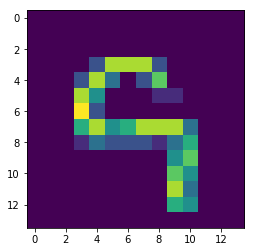

In [36]:
print(predict(W,testData[15:25]))

plt.imshow( np.reshape(testData[18],(14,14)))
print(testLabel2[fileNo]) 
    
        